# Kategoria klient operatora sieci komórkowe:

__Kontekst:__
Zbiór danych zawiera różne informacje o klientach, takie jak wiek, region itp. Zawiera informacje pobrane przez firmę telekomunikacyjną.

__Zbiór danych zawiera:__
	Opis i specyfika;
	Kod regionu określający obszar, do którego należą klienci;
	Okres, na jaki wybrali firmę;
	Wiek klientów;
	Dochód, średnie wynagrodzenie;
	Stan cywilny;
	 Adres Strefa;
	Grupa wykształcenia;
	Lata zatrudnienia;
	Status emerytalny;
	Płeć;
	Kod rejonu, w którym mieszkają;
    Kategoria klienta.


In [1]:
# ladowanie biblioteki pandas, sklearn.linear_model, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import random
from sklearn.linear_model import LogisticRegression 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 
from sklearn import svm, datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:
# zaladowanie bazy danych 
df = pd.read_csv('Telecust1.csv')

#prezntcja danych
df

,region,tenure,age,income,marital,address,ed,employ,retire,gender,reside,custcat
0,2,13,44,64,1,9,4,5,0,0,2,A
1,3,11,33,136,1,7,5,5,0,0,6,D
2,3,68,52,116,1,24,1,29,0,1,2,C
3,2,33,33,33,0,12,2,0,0,1,1,A
4,2,23,30,30,1,9,1,2,0,0,4,C
...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,10,39,27,0,0,3,0,0,1,3,A
996,1,7,34,22,0,2,5,5,0,1,1,A
997,3,67,59,944,0,40,5,33,0,1,1,D
998,3,70,49,87,0,18,2,22,0,1,1,C


__Analiza Statytyczana:__ Zbiór danych poddano analizie statycznej. 
Dla zmiennej wiek wyliczono średnią, medianę, percentyl rzedu 50, 25, 75, wariancję i odchylene standardowe.

In [3]:
# podstawowa analiza statytyczna danych
df.describe()

,region,tenure,age,income,marital,address,ed,employ,retire,gender,reside
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,77.535000,0.495000,11.551000,2.671000,10.987000,0.047000,0.517000,2.331000
std,0.8162,21.359812,12.558816,107.044165,0.500225,10.086681,1.222397,10.082087,0.211745,0.499961,1.435793
min,1.0000,1.000000,18.000000,9.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1.0000,17.000000,32.000000,29.000000,0.000000,3.000000,2.000000,3.000000,0.000000,0.000000,1.000000
50%,2.0000,34.000000,40.000000,47.000000,0.000000,9.000000,3.000000,8.000000,0.000000,1.000000,2.000000
75%,3.0000,54.000000,51.000000,83.000000,1.000000,18.000000,4.000000,17.000000,0.000000,1.000000,3.000000
max,3.0000,72.000000,77.000000,1668.000000,1.000000,55.000000,5.000000,47.000000,1.000000,1.000000,8.000000


__Przygotowanie danych do analizy:__ zmiana kategorii klienta na dane liczbowe 

In [4]:
arr = df[['region','tenure','age','income','marital','address','ed',
          'employ','retire','gender','reside','custcat']].values 
tab =[]

# dla kazdego klienta przyporzadkowuje odpowiednia grupe
for i in range(0,1000):
    if (arr[i,11] == 'A'):
        tab.append(0)  
    elif (arr[i,11] ==  'B'):
        tab.append(0)
    elif (arr[i,11] ==  'C'):
        tab.append(1)
    else:
        tab.append(1)
        
# print(arr[:, 11]) 
# print(df[['custcat']])
# print(tab)

# dodanie listy do bazy
df['custcat1'] = tab

# prezentacja bazy
df


,region,tenure,age,income,marital,address,ed,employ,retire,gender,reside,custcat,custcat1
0,2,13,44,64,1,9,4,5,0,0,2,A,0
1,3,11,33,136,1,7,5,5,0,0,6,D,1
2,3,68,52,116,1,24,1,29,0,1,2,C,1
3,2,33,33,33,0,12,2,0,0,1,1,A,0
4,2,23,30,30,1,9,1,2,0,0,4,C,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,10,39,27,0,0,3,0,0,1,3,A,0
996,1,7,34,22,0,2,5,5,0,1,1,A,0
997,3,67,59,944,0,40,5,33,0,1,1,D,1
998,3,70,49,87,0,18,2,22,0,1,1,C,1


__Klasyfikacja graficzna:__ 

    -- Wiek i zatrudnienie, a grupa klasyfikacyjna

Text(0, 0.5, 'employ')

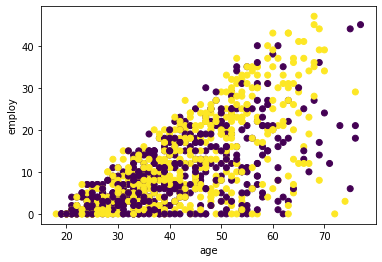

In [5]:
plt.scatter(df['age'], df['employ'], c=df['custcat1'])
plt.xlabel('age')
plt.ylabel('employ') 

    -- Wiek i czas, na który wybrali firmę, a grupa klasyfikacyjna

Text(0, 0.5, 'tenure')

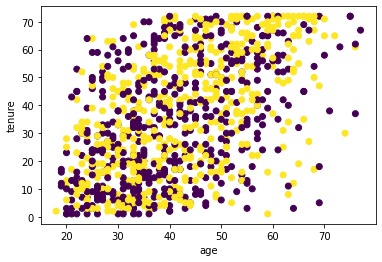

In [6]:
plt.scatter(df['age'], df['tenure'], c=df['custcat1'])
plt.xlabel('age')
plt.ylabel('tenure') 

    -- Wiek i miejsce zamiesznia, a grupa klasyfikacyjna

Text(0, 0.5, 'age')

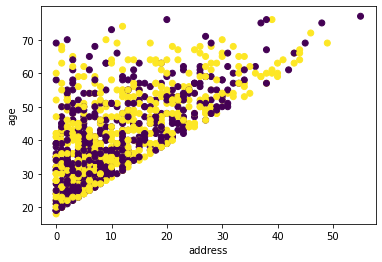

In [7]:
plt.scatter(df['address'], df['age'], c=df['custcat1'])
plt.xlabel('address')
plt.ylabel('age') 

__Tworzenie modelu liniowego:__ zaklasyfikowanie do grupy określono na podstawie wieku i średnich zarobków klienta 

In [8]:
# tworzenie zmiennych X
X1 = df[['income', 'age']].values
y1 = df['custcat1'].values

# tworzenie modelu liniowej regresji
model1 = LogisticRegression()
model1.fit(X1, y1)
 
# prezentacja dopasowania modelu
print(model1.coef_, model1.intercept_) 

[[0.00291414 0.00614615]] [-0.40322629]


__Dokonywanie prognoz za pomocą modelu i porównanie z rzeczywistymi danymi__

In [9]:
# przewidywanie modelu
print(model1.predict(X1[:10]))
# porównanie z danych rzeczywistymi
print(y1[:10]) 

[1 1 1 0 0 1 0 1 1 1]
[0 1 1 0 1 1 0 1 1 0]


__Dokonanie prognoz za pomocą modelu na przypadkowych danych__

In [10]:
# nowe dane
dane1 = []

# pętla tworząca nowe dane
for i in range(0,10):
        dane1.append([random.randint(1,200),random.randint(1,100)])

# prezentacja nowych danych
print("Nowe dane:", dane1)
# modelowanie nowych danych
print(model1.predict(dane1))

Nowe dane: [[126, 75], [73, 68], [88, 70], [37, 68], [144, 79], [145, 22], [28, 85], [110, 63], [150, 86], [34, 89]]
[1 1 1 1 1 1 1 1 1 1]


__Ewaluacja modelu__

In [11]:
y1_pred = model1.predict(X1)
print((y1 == y1_pred).sum())
print((y1 == y1_pred).sum() / y1.shape[0])
print(model1.score(X1, y1)) 

563
0.563
0.563


__Dokładność, precyzja, pełność i wynik F1__

In [12]:
#prezentacja wartości okreslających ewaluacje
print("accuracy:", accuracy_score(y1, y1_pred))
print("precision:", precision_score(y1, y1_pred))
print("recall:", recall_score(y1, y1_pred))
print("f1 score:", f1_score(y1, y1_pred)) 

accuracy: 0.563
precision: 0.5796812749003984
recall: 0.562862669245648
f1 score: 0.5711481844946026


__Macierz pomyłek__
TN = 272
FP = 211
FN = 226
TP = 291

In [13]:
#importowanie biblioteki do tworzenia macierzy
from sklearn.metrics import confusion_matrix

#rysowanie macierzy
print(confusion_matrix(y1, y1_pred)) 

[[272 211]
 [226 291]]


__Zbiory uczące i testowe__

In [14]:
#importowanie biblioteki do podziału danych na zbiór uczący i testowy
from sklearn.model_selection import train_test_split 

# tworzenie zmiennych X
X1 = df[['income', 'age']].values
y1 = df['custcat1'].values

#losowo rozdzielanie danych do zbioru uczącego i testowego
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1)

#prezentowanie zbiorów
print("whole dataset:", X1.shape, y1.shape)
print("training set:", X1_train.shape, y1_train.shape) 
print("test set:", X1_test.shape, y1_test.shape) 
print("*********")

# tworzenie modelu liniowej regresji
model3 = LogisticRegression()
model3.fit(X1_train, y1_train)
#ewaluacja wstępna
print(model3.score(X1_test, y1_test))


whole dataset: (1000, 2) (1000,)
training set: (750, 2) (750,)
test set: (250, 2) (250,)
*********
0.516


__Ewaluacja hold-out:__ zbiór uczący 75%   zbiór testowy 25%


In [15]:
#ewaluacja
y1_pred = model3.predict(X1_test)
print("accuracy:", accuracy_score(y1_test, y1_pred))
print("precision:", precision_score(y1_test, y1_pred))
print("recall:", recall_score(y1_test, y1_pred))
print("f1 score:", f1_score(y1_test, y1_pred))  

accuracy: 0.516
precision: 0.6521739130434783
recall: 0.31690140845070425
f1 score: 0.4265402843601896


__K-krotny sprawdzian krzyżowy__

In [26]:
#impport biblioteki do sprawdzianu krzyżowego
from sklearn.model_selection import KFold 

scores = []
#utwrozono 5 fragmentów i wprowadzono losową kolejność danych 
kf = KFold(n_splits=5, shuffle=True)

for train_index, test_index in kf.split(X1):
    # tworzenie zmiennych X
    X1_train, X1_test = X1[train_index], X1[test_index]
    #określanie y
    y1_train, y1_test = y1[train_index], y1[test_index] 
    # tworzenie modelu liniowej regresji
    model = LogisticRegression()
    model.fit(X1_train, y1_train)
    #ewaluacja
    scores.append(model.score(X1_test, y1_test))
print(scores)
print(np.mean(scores))
# final_model = LogisticRegression()
# final_model.fit(X1, y1)


[0.595, 0.545, 0.52, 0.595, 0.54]
0.5589999999999999


In [33]:
def score_model(X1, y1, kfs): 
    scores = []
    X1 = X1.values
    y1 = y1.values
    #utworzono kfs fragmentów i wprowadzono losową kolejność danych 
    kf = KFold(n_splits=kfs, shuffle=True)
    for train_index, test_index in kf.split(X1):
        # tworzenie listy X1_train, X1_test
        X1_train, X1_test = X1[train_index], X1[test_index]
        #określanie listy y1_train, y1_test
        y1_train, y1_test = y1[train_index], y1[test_index] 
        # tworzenie modelu liniowej regresji
        modelx = LogisticRegression()
        modelx.fit(X1_train, y1_train)
        #sprawdzanie
        scores.append(modelx.score(X1_test, y1_test))
    #pokazuje wyniki dla każdego z testów    
    print(scores)
    #pokazuje średni wynik testów
    print(np.mean(scores))
    final_modelx = LogisticRegression()
    final_modelx.fit(X1, y1)
    
score_model(df[['age','retire']], df['custcat1'], 3) 
score_model(df[['age','tenure']], df['custcat1'], 2) 
score_model(df[['region','age','income','employ','gender']], df['custcat1'], 5) 
score_model(df[['region','age','gender']], df['custcat1'], 4) 

[0.5479041916167665, 0.5465465465465466, 0.4804804804804805]
0.5249770728812645
[0.524, 0.544]
0.534
[0.535, 0.52, 0.56, 0.56, 0.505]
0.536
[0.508, 0.548, 0.516, 0.536]
0.527


__Krzywa charakterystyki roboczej odbiornika ROC__

"Krzywa ROC to jeden ze sposobów wizualizacji jakości klasyfikacji, pokazujący zależności wskaźników TPR (True Positive Rate) oraz FPR (False Positive Rate).

Im większe AUC tym lepiej: AUC = 1 (klasyfikator idealny), 
AUC = 0.5 (klasyfikator losowy), AUC < 0.5 (nieprawidłowy klasyfikator (gorszy niż losowy))."

Accuracy 0.576


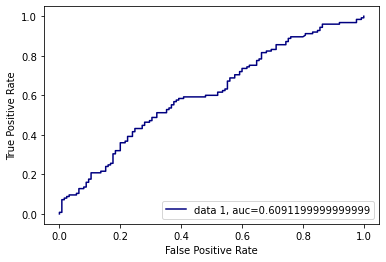

In [28]:
# tworzenie zmiennych X i y
X = df[['income', 'age','address']].values
y = df['custcat1'].values

#podział bazy danych na zbiór ćwiczeniowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=True)

#przeprowadzenie regresji - model
ml = LogisticRegression(penalty='l2', C=0.1)
ml.fit(X_train, y_train)
y_pred = ml.predict(X_test)

#dopasowanie
print("Accuracy", metrics.accuracy_score(y_test, y_pred))

#krzywa AUC
y_pred_proba = ml.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#wykres
plt.plot(fpr,tpr,label="data 1, auc="+str(auc), color="navy")
plt.legend(loc="lower right")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()


Za pomoca ROC można np: 

-podzielić klientów banku, na tych, którzy będą spłacac kredyt i tych, którzy nie będą tego robić

-zdecydować jaką taktykę podejmie lekarz co do pacjentów

**************************************************************************
**************************************************************************
__Tworzenie modelu liniowego:__ zaklasyfikowanie do grupy określono na podstawie wieku, średnich zarobków klienta, płci, zatrudnienia, statusu emerytalnego i miejsca zamieszkania

In [20]:
# tworzenie zmiennych X
X2 = df[['income','age','gender','employ','retire','reside']].values
y2 = df['custcat1'].values

# tworzenie modelu liniowej regresji
model2 = LogisticRegression()
model2.fit(X2, y2)
 
# prezentacja dopasowania modelu
print(model2.coef_, model2.intercept_) 

[[ 0.00209159 -0.00412364 -0.11702429  0.0241935   0.36826992  0.10260867]] [-0.37481122]


__Dokonywanie prognoz za pomocą modelu i porównanie z rzeczywistymi danymi__

In [21]:
# przewidywanie modelu
print(model2.predict(X2[:10]))
# porównanie z danych rzeczywistymi
print(y2[:10]) 

[0 1 1 0 1 1 1 1 1 1]
[0 1 1 0 1 1 0 1 1 0]


__Dokonoanie prognoz za pomocą modelu na przypadkowych danych__

In [22]:
# nowe dane
dane2 = []

# pętla tworząca nowe dane
for i in range(0,10):
        dane2.append([random.randint(1,200),random.randint(1,100),
                      random.randint(0,1),random.randint(1,100),
                      random.randint(0,1),random.randint(1,6)])

# prezentacja nowych danych
print(dane2)
# modelowanie nowych danych
print(model2.predict(dane2))

[[5, 68, 1, 90, 0, 4], [87, 55, 0, 15, 1, 1], [150, 65, 0, 59, 0, 5], [146, 90, 0, 11, 0, 3], [149, 21, 0, 92, 0, 5], [135, 75, 1, 21, 1, 2], [7, 60, 0, 23, 0, 5], [43, 51, 1, 26, 1, 6], [72, 9, 1, 39, 1, 4], [182, 49, 1, 55, 1, 1]]
[1 1 1 1 1 1 1 1 1 1]


__Ewaluacja modelu__

In [23]:
y2_pred = model2.predict(X2)
print((y2 == y2_pred).sum())
print((y2 == y2_pred).sum() / y2.shape[0])
print(model2.score(X2, y2))

557
0.557
0.557


__Dokładność, precyzja, pełność i wynik F1__

In [24]:
print("accuracy:", accuracy_score(y2, y2_pred))
print("precision:", precision_score(y2, y2_pred))
print("recall:", recall_score(y2, y2_pred))
print("f1 score:", f1_score(y2, y2_pred)) 

accuracy: 0.557
precision: 0.5742971887550201
recall: 0.5531914893617021
f1 score: 0.5635467980295567


__Macierz pomyłek__
TN = 271
FP = 211
FN = 231
TP = 286

In [25]:
#importowanie biblioteki do tworzenia macierzy
from sklearn.metrics import confusion_matrix

#rysowanie macierzy
print(confusion_matrix(y2, y2_pred)) 

[[271 212]
 [231 286]]


__wnioski__ trudno jest za pomocą regresji znaelżć dobry model dla danych towarzystwa telefonicznego.

Najlepszy jest model przewidujący klasyfikację na podstawie: 'income','age','gender','employ','retire','reside'

Jego dokładność wynosi 0.557.